# Utilities Consumption Study
# Features Correlation Notebook
### Sidclay da Silva
### July 2020
---

### Introduction

This notebook is part of a study which includes analysis of self water and electricity consumption, and the relation between consumption and the variation of local temperature and relative humidity.

---

In [1]:
# import required libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read data from previous notebooks into ```Pandas``` dataframe.

In [2]:
# read electricity data
df_electr = pd.read_feather('./Data_source/Features_Electricity.feather')

# read water data
df_water = pd.read_feather('./Data_source/Features_Water.feather')

# read weather data
df_weather = pd.read_feather('./Data_source/Features_Weather.feather')

print('Data ready.')

Data ready.


Check dataframes information.

In [3]:
# check dataframes information
print('df_electr\n')
df_electr.info()

print('\ndf_water\n')
df_water.info()

print('\ndf_weather\n')
df_weather.info()

df_electr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   period          68 non-null     datetime64[ns]
 1   electr_day_kwh  68 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB

df_water

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   period        68 non-null     datetime64[ns]
 1   water_day_m3  68 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB

df_weather

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   period            

*df_electr* and *df_water* contain 68 observations each, from **2014-11** until **2020-06**.

*df_weather* contains 78 observations, from **2014-01** until **2020-06**.

Merge the three dataframes into one object using ```inner join```, observations between **2014-01** and **2014-10** in *df_weather* will be out of the merging.

In [4]:
# merge electr with water, and result with weather
df_features = pd.merge(df_electr, df_water, on='period', how='inner').merge(df_weather, on='period', how='inner')

# rename columns
df_features = df_features.rename(columns={'electr_day_kwh':'electricity',
                                          'water_day_m3':'water',
                                          'temp_mean':'temperature',
                                          'rel_humidity_mean':'humidity'})

df_features

,period,electricity,water,temperature,humidity
0,2014-11-01,4.545,0.424,20.1,78.1
1,2014-12-01,6.267,0.571,21.9,75.2
2,2015-01-01,6.226,0.562,23.7,67.7
3,2015-02-01,1.542,0.375,21.9,78.0
4,2015-03-01,8.743,0.552,21.1,82.6
...,...,...,...,...,...
63,2020-02-01,8.290,0.207,20.8,87.4
64,2020-03-01,9.310,0.452,19.9,84.9
65,2020-04-01,9.152,0.387,18.4,85.8
66,2020-05-01,12.286,0.379,16.9,80.0


Check dataframe information.

In [5]:
# check dataframe information
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   period       68 non-null     datetime64[ns]
 1   electricity  68 non-null     float64       
 2   water        68 non-null     float64       
 3   temperature  68 non-null     float64       
 4   humidity     68 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.2 KB


Remove inital dataframes from memory to save resources.

In [6]:
# remove dataframes from memory
del df_electr, df_water, df_weather

**Water Consumption**

Analyse correlation between column *water* and the different features, *temperature* and *humidity*.

Check features correlation using heatmap.

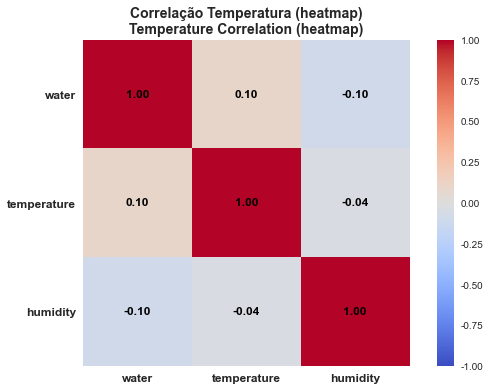

In [7]:
# create correlation table
corr = df_features[['water','temperature','humidity']].corr().round(decimals=3)

# define plot style
plt.style.use('seaborn')

# create plot figure
fig, ax = plt.subplots(figsize=(10,6))

# create the heatmap
img = ax.imshow(corr, cmap='coolwarm')

# set color limits and scale
img.set_clim(-1, 1)
cbar = ax.figure.colorbar(img, ax=ax, format='%.2f')

# set title, x-ticks, y-ticks and remove grids
plt.title('Correlação Temperatura (heatmap)\nTemperature Correlation (heatmap)', fontsize=14, fontweight=900)
plt.xticks(np.arange(0, corr.shape[1]), list(corr.columns), fontsize=12, fontweight=600)
plt.yticks(np.arange(0, corr.shape[1]), list(corr.columns), fontsize=12, fontweight=600)
ax.grid(False)

# add correlation captions
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, '{:.2f}'.format(corr.iloc[i, j]), ha='center', va='center', color='black', fontsize=12, fontweight=600)
        
#save to file
plt.savefig('./Images/Corr_Plot_01_Heatmap_Water.png', bbox_inches='tight')

# show plot
plt.show()

*Water consumption* does not seem to be correlated neither to *temperature* nor to *relative humidity*.

**Water consumption vs. Relative Humidity**

Analyse correlation coeficient with **Pearson r** and signifigance **P-value** for columns *water* and *humidity*.

In [8]:
# check Pearson r and P-value
r, p = stats.pearsonr(df_features['water'], df_features['humidity'])

# print results
print('Correlation: Water consumption vs. Relative Humidity\n\
 Pearson r = {:.2f}\n P-value = {:.9f}'.format(r,p))

Correlation: Water consumption vs. Relative Humidity
 Pearson r = -0.10
 P-value = 0.421329772


For **Pearson r = -0.10** there is a weak correlation.

For **P-value > 0.1** there is no evidence of statistically significant correlation.

Check linear regression for columns *water* and *humidity* with regression plot.

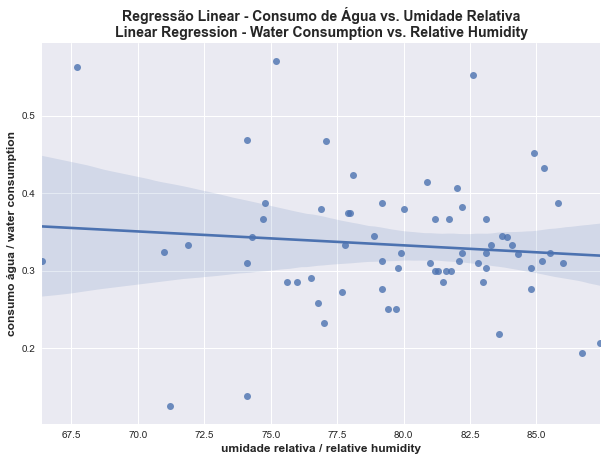

In [9]:
# create the plot figure
fig, ax = plt.subplots(figsize=(10,7))

# create scatter plot with regression line
ax = sns.regplot(x='humidity', y='water', data=df_features)

# define title and labels
plt.title('Regressão Linear - Consumo de Água vs. Umidade Relativa\n\
Linear Regression - Water Consumption vs. Relative Humidity', fontsize=14, fontweight=600)
plt.xlabel('umidade relativa / relative humidity', fontsize=12, fontweight=600)
plt.ylabel('consumo água / water consumption', fontsize=12, fontweight=600)

#save to file
plt.savefig('./Images/Corr_Plot_02_LRegr_WaterHumidity.png', bbox_inches='tight')

plt.show()

**Water consumption vs. Temperature**

Analyse correlation coeficient with **Pearson r** and signifigance **P-value** for columns *water* and *temperature*.

In [10]:
# check Pearson r and P-value
r, p = stats.pearsonr(df_features['water'], df_features['temperature'])

# print results
print('Correlation: Water consumption vs. Temperature\n\
 Pearson r = {:.2f}\n P-value = {:.9f}'.format(r,p))

Correlation: Water consumption vs. Temperature
 Pearson r = 0.10
 P-value = 0.437977141


For **Pearson r = -0.10** there is a weak correlation.

For **P-value > 0.1** there is no evidence of statistically significant correlation.

Check linear regression for columns *water* and *temperature* with regression plot.

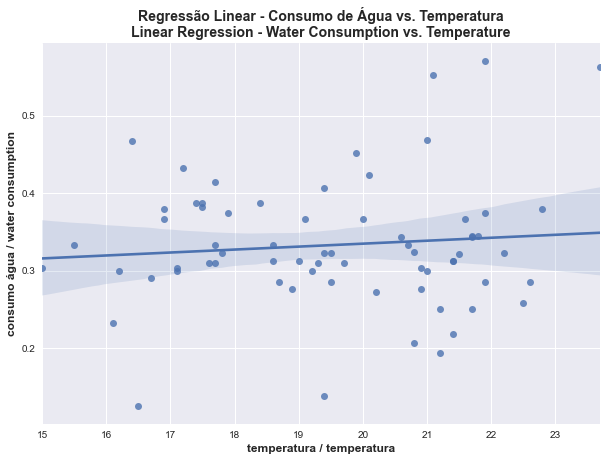

In [11]:
# create the plot figure
fig, ax = plt.subplots(figsize=(10,7))

# create scatter plot with regression line
ax = sns.regplot(x='temperature', y='water', data=df_features)

# define title and labels
plt.title('Regressão Linear - Consumo de Água vs. Temperatura\n\
Linear Regression - Water Consumption vs. Temperature', fontsize=14, fontweight=600)
plt.xlabel('temperatura / temperatura', fontsize=12, fontweight=600)
plt.ylabel('consumo água / water consumption', fontsize=12, fontweight=600)

#save to file
plt.savefig('./Images/Corr_Plot_03_LRegr_WaterTemp.png', bbox_inches='tight')

plt.show()

**Electricity Consumption**

Analyse correlation between column *electricity* and the different features, *temperature* and *humidity*.

Check features correlation using heatmap.

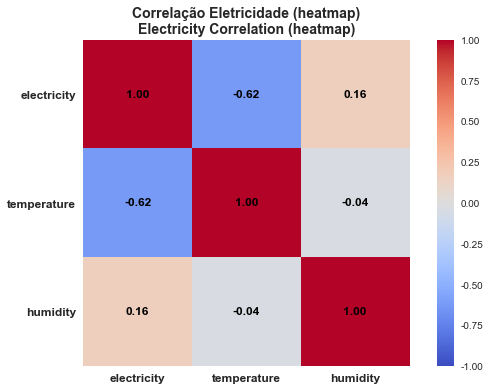

In [12]:
# create correlation table
corr = df_features[['electricity','temperature','humidity']].corr().round(decimals=3)

# define plot style
plt.style.use('seaborn')

# create plot figure
fig, ax = plt.subplots(figsize=(10,6))

# create the heatmap
img = ax.imshow(corr, cmap='coolwarm')

# set color limits and scale
img.set_clim(-1, 1)
cbar = ax.figure.colorbar(img, ax=ax, format='%.2f')

# set title, x-ticks, y-ticks and remove grids
plt.title('Correlação Eletricidade (heatmap)\nElectricity Correlation (heatmap)', fontsize=14, fontweight=900)
plt.xticks(np.arange(0, corr.shape[1]), list(corr.columns), fontsize=12, fontweight=600)
plt.yticks(np.arange(0, corr.shape[1]), list(corr.columns), fontsize=12, fontweight=600)
ax.grid(False)

# add correlation captions
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, '{:.2f}'.format(corr.iloc[i, j]), ha='center', va='center', color='black', fontsize=12, fontweight=600)
        
#save to file
plt.savefig('./Images/Corr_Plot_04_Heatmap_Electr.png', bbox_inches='tight')

# show plot
plt.show()

*Electricity consumption* seems to be correlated to *temperature* but not much to *relative humidity*.

**Electricity Consumption vs. Relative Humidity**

Analyse correlation coeficient with **Pearson r** and signifigance **P-value** for columns *electricity* and *humidity*.

In [13]:
# check Pearson r and P-value
r, p = stats.pearsonr(df_features['electricity'], df_features['humidity'])

# print results
print('Correlation: Electricity consumption vs. Relative Humidity\n\
 Pearson r = {:.2f}\n P-value = {:.9f}'.format(r,p))

Correlation: Electricity consumption vs. Relative Humidity
 Pearson r = 0.16
 P-value = 0.188638451


For **Pearson r = 0.16** there is a weak correlation.

For **P-value > 0.1** there is no evidence of statistically significant correlation.

Check linear regression for columns *electricity* and *humidity* with regression plot.

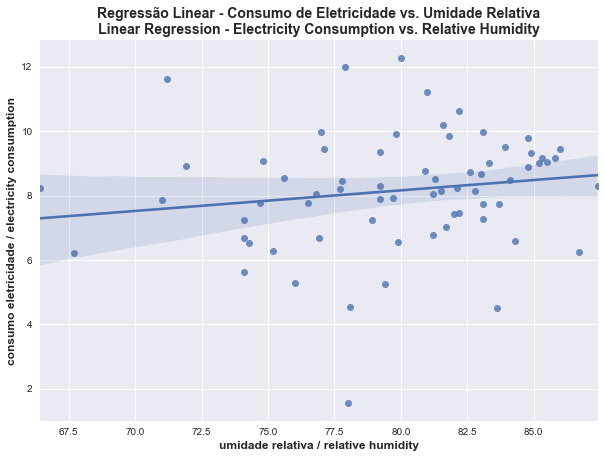

In [14]:
# create the plot figure
fig, ax = plt.subplots(figsize=(10,7))

# create scatter plot with regression line
ax = sns.regplot(x='humidity', y='electricity', data=df_features)

# define title and labels
plt.title('Regressão Linear - Consumo de Eletricidade vs. Umidade Relativa\n\
Linear Regression - Electricity Consumption vs. Relative Humidity', fontsize=14, fontweight=600)
plt.xlabel('umidade relativa / relative humidity', fontsize=12, fontweight=600)
plt.ylabel('consumo eletricidade / electricity consumption', fontsize=12, fontweight=600)

#save to file
plt.savefig('./Images/Corr_Plot_05_LRegr_ElectrHumidity.png', bbox_inches='tight')

plt.show()

**Electricity Consumption vs. Temperature**

Analyse correlation coeficient with **Pearson r** and signifigance **P-value** for columns *electricity* and *temperature*.

In [15]:
# check Pearson r and P-value
r, p = stats.pearsonr(df_features['electricity'], df_features['temperature'])

# print results
print('Correlation: Electricity consumption vs. Temperature\n\
 Pearson r = {:.2f}\n P-value = {:.9f}'.format(r,p))

Correlation: Electricity consumption vs. Temperature
 Pearson r = -0.62
 P-value = 0.000000017


For **Pearson r = -0.62** there is a moderate negative correlation.

For **P-value < 0.001** there is evidence of statistically significant correlation.

Check linear regression for columns *electricity* and *temperature* with regression plot.

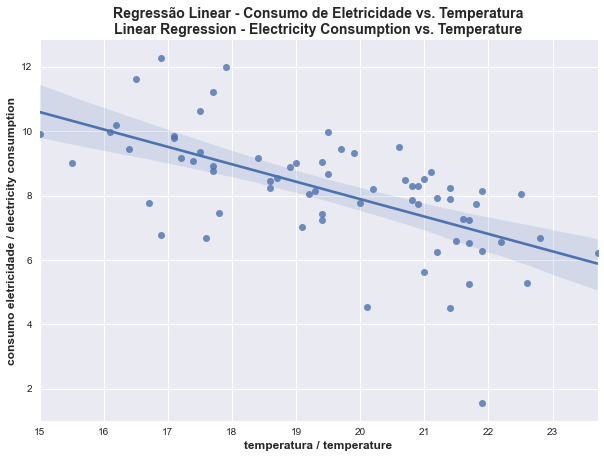

In [16]:
# create the plot figure
fig, ax = plt.subplots(figsize=(10,7))

# create scatter plot with regression line
ax = sns.regplot(x='temperature', y='electricity', data=df_features)

# define title and labels
plt.title('Regressão Linear - Consumo de Eletricidade vs. Temperatura\n\
Linear Regression - Electricity Consumption vs. Temperature', fontsize=14, fontweight=600)
plt.xlabel('temperatura / temperature', fontsize=12, fontweight=600)
plt.ylabel('consumo eletricidade / electricity consumption', fontsize=12, fontweight=600)

#save to file
plt.savefig('./Images/Corr_Plot_06_LRegr_ElectrTemp.png', bbox_inches='tight')

plt.show()

Check variance of the data with residual plot.

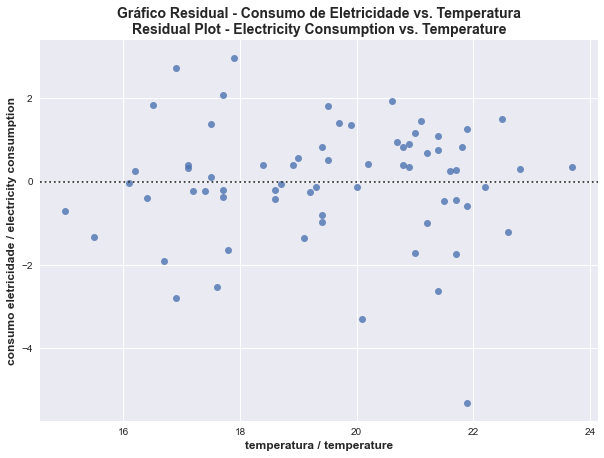

In [17]:
# create the plot figure
fig, ax = plt.subplots(figsize=(10,7))

# create residual plot
ax = sns.residplot(x='temperature', y='electricity', data=df_features)

# define title and labels
plt.title('Gráfico Residual - Consumo de Eletricidade vs. Temperatura\n\
Residual Plot - Electricity Consumption vs. Temperature', fontsize=14, fontweight=600)
plt.xlabel('temperatura / temperature', fontsize=12, fontweight=600)
plt.ylabel('consumo eletricidade / electricity consumption', fontsize=12, fontweight=600)

#save to file
plt.savefig('./Images/Corr_Plot_07_Resd_ElectrTemp.png', bbox_inches='tight')

plt.show()